In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
df = pd.DataFrame(pd.read_csv("data_collection/Total_Wages_Emp_SanDiego.csv"))
wages = pd.DataFrame(pd.read_csv("min_wage.csv"))
df = df.merge(wages, how = "outer", on = "Year")
df.rename(columns={'Minimum Wage SF' : "min_SF", "Yearly Total Emp": "Jobs",'Minimum Wage SD' : "min_SD"}, inplace=True)
df.head()

,Year,Total Wages Collected,Jobs,min_SF,min_SD
0,2004,1.533707e+09,268623.750000,8.50,9.0
1,2005,1.580587e+09,272649.416667,8.62,9.0
2,2006,1.665869e+09,280002.916667,8.82,9.0
3,2007,1.718520e+09,284448.000000,9.14,9.0
4,2008,1.693007e+09,279503.000000,9.36,9.0


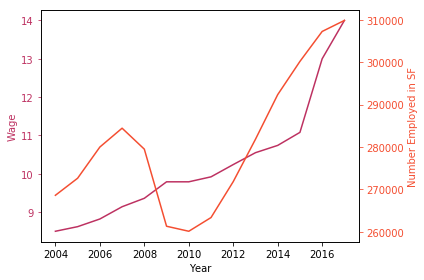

In [27]:
year = df["Year"]
wage = df["min_SF"]
jobs = df["Jobs"]

fig, ax1 = plt.subplots()
ax1.plot(year, wage, color = "#bd3161")
ax1.set_xlabel("Year")
ax1.set_ylabel("Wage", color="#bd3161")
ax1.tick_params("y", colors="#bd3161")

ax2 = ax1.twinx()
ax2.plot(year,jobs, color = "#f44e31")
ax2.set_ylabel("Number Employed in SF", color="#f44e31")
ax2.tick_params("y", colors="#f44e31")

fig.tight_layout()
plt.savefig('SFline_jobs.png')
plt.show()



In [28]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Jobs ~ min_SF", data = df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Jobs   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     17.58
Date:                Sat, 09 Dec 2017   Prob (F-statistic):            0.00125
Time:                        12:59:43   Log-Likelihood:                -148.86
No. Observations:                  14   AIC:                             301.7
Df Residuals:                      12   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.998e+05   1.96e+04     10.207      0.0

/Users/chelan/anaconda3/envs/python_data/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


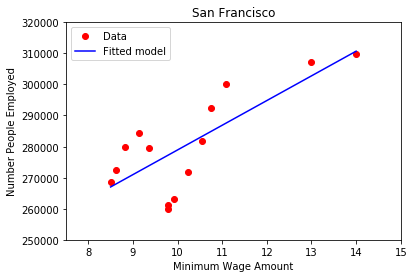

In [29]:
plt.plot(wage, jobs, 'ro')
plt.plot(wage, fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.ylim(min(jobs)-10000, max(jobs)+10000)
plt.xlim(min(wage)-1, max(wage)+1)
plt.xlabel('Minimum Wage Amount')
plt.ylabel('Number People Employed')
plt.title('San Francisco')
plt.savefig('SFregression_jobs.png')
plt.show()


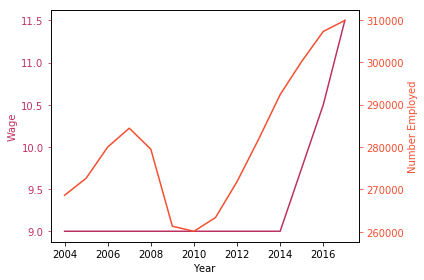

In [30]:
#Similar analysis for San Diego
year = df["Year"]
wage = df["min_SD"]
jobs = df["Jobs"]

fig, ax1 = plt.subplots()
ax1.plot(year, wage, color = "#bd3161")
ax1.set_xlabel("Year")
ax1.set_ylabel("Wage", color="#bd3161")
ax1.tick_params("y", colors="#bd3161")

ax2 = ax1.twinx()
ax2.plot(year,jobs, color = "#f44e31")
ax2.set_ylabel("Number Employed", color="#f44e31")
ax2.tick_params("y", colors="#f44e31")

fig.tight_layout()
plt.savefig('SDline_jobs.png')
plt.show()

In [31]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Jobs ~ min_SD", data = df)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Jobs   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     19.11
Date:                Sat, 09 Dec 2017   Prob (F-statistic):           0.000909
Time:                        12:59:44   Log-Likelihood:                -148.51
No. Observations:                  14   AIC:                             301.0
Df Residuals:                      12   BIC:                             302.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.229e+05   3.63e+04      3.387      0.0

/Users/chelan/anaconda3/envs/python_data/lib/python3.5/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


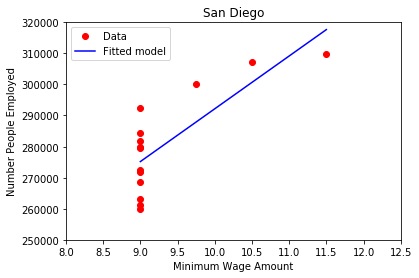

In [32]:
plt.plot(wage, jobs, 'ro')
plt.plot(wage, fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.ylim(min(jobs)-10000, max(jobs)+10000)
plt.xlim(min(wage)-1, max(wage)+1)
plt.xlabel('Minimum Wage Amount')
plt.ylabel('Number People Employed')
plt.title('San Diego')
plt.savefig('SDregression_jobs.png')
plt.show()